In [1]:
import json
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [2]:
mpl.rc('font', **{'size': 14})
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
# print files in the current directory
for file in Path('.').iterdir():
    if file.is_file():
        print(file.name)

plots.ipynb
relaxed_cvar_tradeoff.ipynb
gradient_experiments.ipynb


In [4]:
# k-rec results
base_path = Path("../../results/1746552909")
dataset = "movielens"

mean_results = [
    f"{dataset}_mean_usage_group_100_50_1_0_0.1_0.35_0.5_0.75_1_0.95.json",
    f"{dataset}_mean_usage_group_100_50_5_0_0.1_0.35_0.5_0.75_1_0.95.json",
    f"{dataset}_mean_usage_group_100_50_10_0_0.1_0.35_0.5_0.75_1_0.95.json"
]

parsed_problem_results = {
    "mean": {},
    "min": {},
}


for (result, k_rec) in zip(mean_results, [1, 5, 10]):
    with open(base_path / result) as f:
        data = json.load(f)
        problem_results = data["results"]["usage_group"][1]["0.95"]
        max_consumer_util_results = problem_results["0"]
        for gamma, results in problem_results.items():
            normalized_values =  np.array(results) / np.array(max_consumer_util_results)
            problem_results[gamma] = {
                "mean": np.mean(normalized_values),
                "stderr": np.std(normalized_values) / np.sqrt(len(normalized_values)),
            }

        parsed_problem_results["mean"][k_rec] = problem_results



min_results = [
    f"{dataset}_min_usage_group_100_50_1_0_0.1_0.35_0.5_0.75_1_0.95.json",
    f"{dataset}_min_usage_group_100_50_5_0_0.1_0.35_0.5_0.75_1_0.95.json",
    f"{dataset}_min_usage_group_100_50_10_0_0.1_0.35_0.5_0.75_1_0.95.json"
]

for (result, k_rec) in zip(min_results, [1, 5, 10]):
    with open(base_path / result) as f:
        data = json.load(f)
        problem_results = data["results"]["usage_group"][1]["0.95"]
        print(problem_results)
        max_consumer_util_results = problem_results["0"]
        for gamma, results in problem_results.items():
            normalized_values =  np.array(results) / np.array(max_consumer_util_results)
            problem_results[gamma] = {
                "mean": np.mean(normalized_values),
                "stderr": np.std(normalized_values) / np.sqrt(len(normalized_values)),
            }

        parsed_problem_results["min"][k_rec] = problem_results

x_axis = [float(key) for key, _ in parsed_problem_results["min"][1].items()]
y1_min = [val["mean"] for _, val in parsed_problem_results["min"][1].items()]
std1_min = [val["stderr"] for _, val in parsed_problem_results["min"][1].items()]
y5_min = [val["mean"] for _, val in parsed_problem_results["min"][5].items()]
std5_min = [val["stderr"] for _, val in parsed_problem_results["min"][5].items()]
y10_min = [val["mean"] for _, val in parsed_problem_results["min"][10].items()]
std10_min = [val["stderr"] for _, val in parsed_problem_results["min"][10].items()]
y1_mean = [val["mean"] for _, val in parsed_problem_results["mean"][1].items()]
std1_mean = [val["stderr"] for _, val in parsed_problem_results["mean"][1].items()]
y5_mean = [val["mean"] for _, val in parsed_problem_results["mean"][5].items()]
std5_mean = [val["stderr"] for _, val in parsed_problem_results["mean"][5].items()]
y10_mean = [val["mean"] for _, val in parsed_problem_results["mean"][10].items()]
std10_mean = [val["stderr"] for _, val in parsed_problem_results["mean"][10].items()]

{'0': [0.8405223485808624, 0.8167439117722358, 0.8466577726486645], '0.1': [0.7890743573024276, 0.6455943035978282, 0.8222584821750483], '0.35': [0.7890743573024276, 0.6455943035978282, 0.8222584821750483], '0.5': [0.7890743573024276, 0.6455943035978282, 0.8222584821750483], '0.75': [0.776473631576665, 0.6245625467507693, 0.7610599555023079], '1': [0.776473631576665, 0.6245625467507693, 0.7610599555023079]}
{'0': [4.128417267981604, 3.7284936582759296, 3.734950019731337], '0.1': [4.128417267981604, 3.7284936582759296, 3.734950019731337], '0.35': [4.128417267981604, 3.7284936582759296, 3.734950019731337], '0.5': [4.128417267981604, 3.7284936582759296, 3.734950019731337], '0.75': [4.128417267981604, 3.7284936582759296, 3.734950019731337], '1': [4.128338165703045, 3.7284936582759296, 3.734950019731337]}
{'0': [7.700372446066839, 4.015386978730387, 7.355493565509793], '0.1': [7.700372446066839, 4.015386978730387, 7.355493565509793], '0.35': [7.700372446066839, 4.015386978730387, 7.35549356

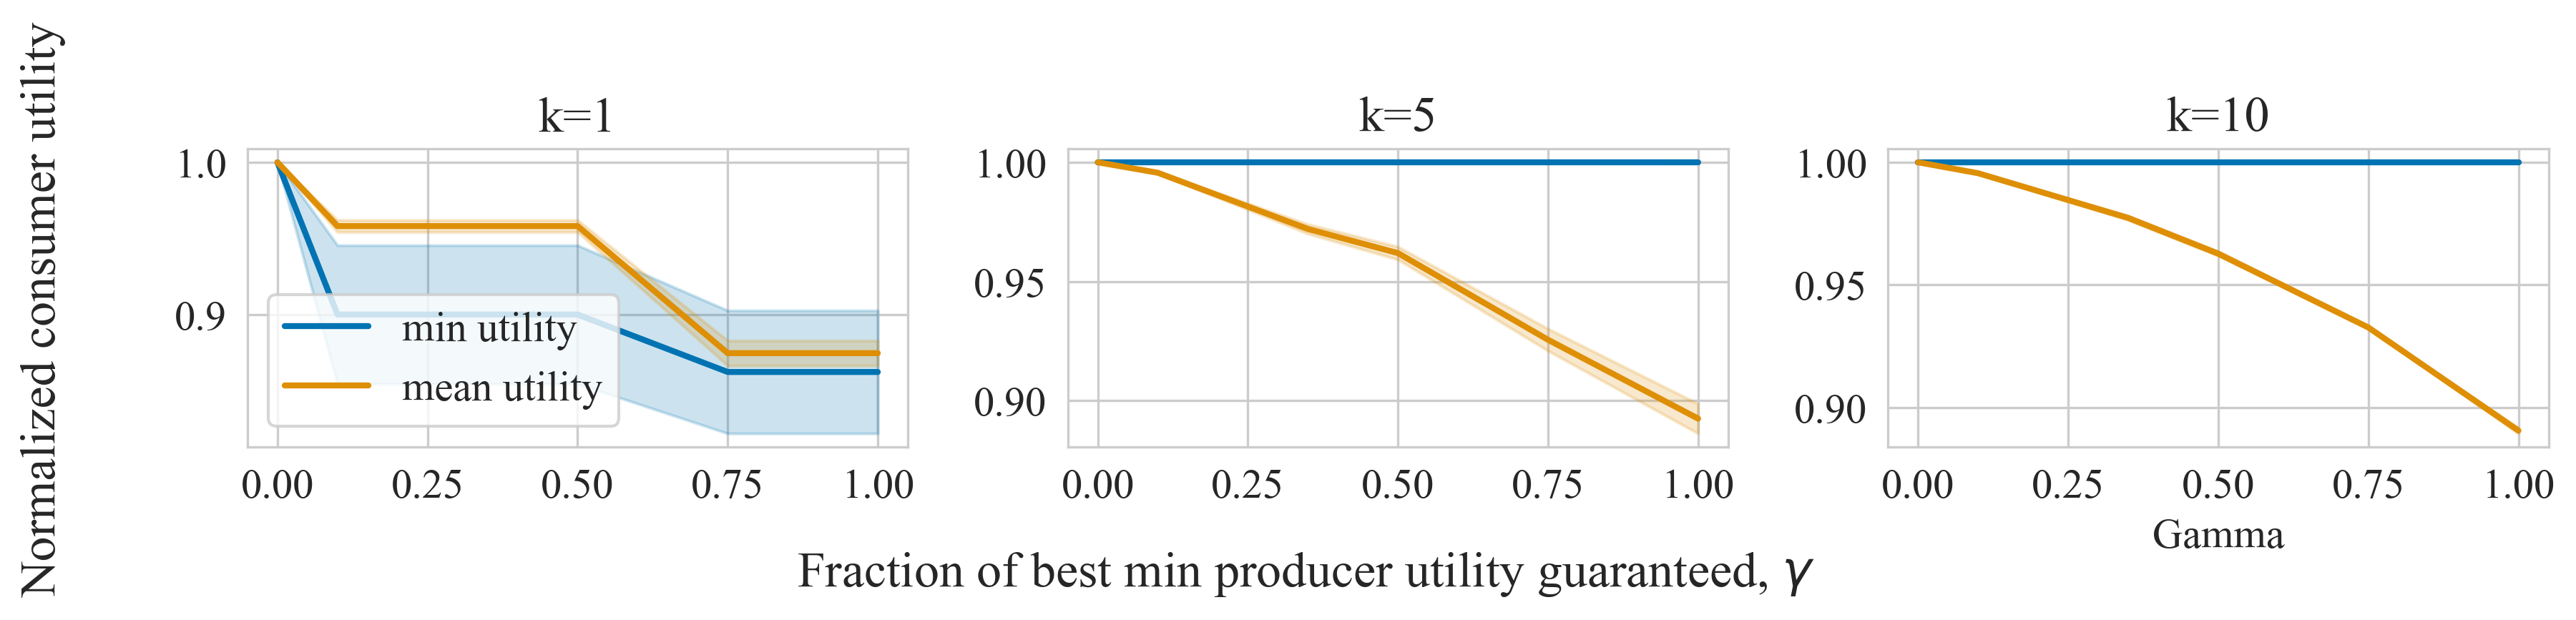

In [5]:
palette = sns.color_palette("colorblind", 2)
sns.set_palette(palette)

fig = figure = plt.figure(figsize=(12, 3), dpi=300)
# create a grid of subplots 1x3
ax1 = figure.add_subplot(1, 3, 1)
ax1.plot(x_axis, y1_min, label="min utility", color=palette[0], linewidth=2)
ax1.fill_between(x_axis, np.array(y1_min) - np.array(std1_min), np.array(y1_min) + np.array(std1_min), alpha=0.2, color=palette[0])
ax1.plot(x_axis, y1_mean, label="mean utility", color=palette[1], linewidth=2)
ax1.fill_between(x_axis, np.array(y1_mean) - np.array(std1_mean), np.array(y1_mean) + np.array(std1_mean), alpha=0.2, color=palette[1])

ax2 = figure.add_subplot(1, 3, 2)
ax2.plot(x_axis, y5_min, label="min utility", color=palette[0], linewidth=2)
ax2.fill_between(x_axis, np.array(y5_min) - np.array(std5_min), np.array(y5_min) + np.array(std5_min), alpha=0.2, color=palette[0])
ax2.plot(x_axis, y5_mean, label="mean utility", color=palette[1], linewidth=2)
ax2.fill_between(x_axis, np.array(y5_mean) - np.array(std5_mean), np.array(y5_mean) + np.array(std5_mean), alpha=0.2, color=palette[1])
ax3 = figure.add_subplot(1, 3, 3)
ax3.plot(x_axis, y10_min, label="min utility", color=palette[0], linewidth=2)
ax3.fill_between(x_axis, np.array(y10_min) - np.array(std10_min), np.array(y10_min) + np.array(std10_min), alpha=0.2, color=palette[0])
ax3.plot(x_axis, y10_mean, label="mean utility", color=palette[1], linewidth=2)
ax3.fill_between(x_axis, np.array(y10_mean) - np.array(std10_mean), np.array(y10_mean) + np.array(std10_mean), alpha=0.2, color=palette[1])
ax1.set_title("k=1")
ax2.set_title("k=5")
ax3.set_title("k=10")
ax3.set_xlabel("Gamma")
ax1.legend(loc="lower left")
fig.supxlabel(
        r"Fraction of best min producer utility guaranteed, $\gamma$",
        x=0.5, y=0.15, ha="center"
    )
    # shift the y‑label further left
fig.supylabel(
        "Normalized consumer utility",
        x=0.01,
        y=0.6,
        ha="center"
    )
plt.tight_layout()
plt.show()


In [6]:
# k-rec results
base_path = Path("../../results/1746552909")
dataset = "amazon"

mean_results = [
    f"{dataset}_mean_usage_group_100_50_1_0_0.1_0.35_0.5_0.75_1_0.95.json",
    f"{dataset}_mean_usage_group_100_50_5_0_0.1_0.35_0.5_0.75_1_0.95.json",
    f"{dataset}_mean_usage_group_100_50_10_0_0.1_0.35_0.5_0.75_1_0.95.json"
]

parsed_problem_results = {
    "mean": {},
    "min": {},
}

for (result, k_rec) in zip(mean_results, [1, 5, 10]):
    with open(base_path / result) as f:
        data = json.load(f)
        problem_results = data["results"]["usage_group"][1]["0.95"]
        max_consumer_util_results = problem_results["0"]
        for gamma, results in problem_results.items():
            normalized_values =  np.array(results) / np.array(max_consumer_util_results)
            problem_results[gamma] = {
                "mean": np.mean(normalized_values),
                "stderr": np.std(normalized_values) / np.sqrt(len(normalized_values)),
            }

        parsed_problem_results["mean"][k_rec] = problem_results



min_results = [
    f"{dataset}_min_usage_group_100_50_1_0_0.1_0.35_0.5_0.75_1_0.95.json",
    f"{dataset}_min_usage_group_100_50_5_0_0.1_0.35_0.5_0.75_1_0.95.json",
    f"{dataset}_min_usage_group_100_50_10_0_0.1_0.35_0.5_0.75_1_0.95.json"
]

for (result, k_rec) in zip(min_results, [1, 5, 10]):
    with open(base_path / result) as f:
        data = json.load(f)
        problem_results = data["results"]["usage_group"][1]["0.95"]
        print(problem_results)
        max_consumer_util_results = problem_results["0"]
        for gamma, results in problem_results.items():
            normalized_values =  np.array(results) / np.array(max_consumer_util_results)
            problem_results[gamma] = {
                "mean": np.mean(normalized_values),
                "stderr": np.std(normalized_values) / np.sqrt(len(normalized_values)),
            }

        parsed_problem_results["min"][k_rec] = problem_results

x_axis = [float(key) for key, _ in parsed_problem_results["min"][1].items()]
y1_min = [val["mean"] for _, val in parsed_problem_results["min"][1].items()]
std1_min = [val["stderr"] for _, val in parsed_problem_results["min"][1].items()]
y5_min = [val["mean"] for _, val in parsed_problem_results["min"][5].items()]
std5_min = [val["stderr"] for _, val in parsed_problem_results["min"][5].items()]
y10_min = [val["mean"] for _, val in parsed_problem_results["min"][10].items()]
std10_min = [val["stderr"] for _, val in parsed_problem_results["min"][10].items()]
y1_mean = [val["mean"] for _, val in parsed_problem_results["mean"][1].items()]
std1_mean = [val["stderr"] for _, val in parsed_problem_results["mean"][1].items()]
y5_mean = [val["mean"] for _, val in parsed_problem_results["mean"][5].items()]
std5_mean = [val["stderr"] for _, val in parsed_problem_results["mean"][5].items()]
y10_mean = [val["mean"] for _, val in parsed_problem_results["mean"][10].items()]
std10_mean = [val["stderr"] for _, val in parsed_problem_results["mean"][10].items()]

{'0': [0.7444830361581711, 0.8666217429432622, 0.7543359331506969], '0.1': [0.7444830361581711, 0.8666217429432622, 0.7543359331506969], '0.35': [0.7444830361581711, 0.8666217429432622, 0.7543359331506969], '0.5': [0.7444830361581711, 0.8666217429432622, 0.7543359331506969], '0.75': [0.7444830361581711, 0.8617930994417073, 0.7543359331506969], '1': [0.7444830361581711, 0.8617930994417073, 0.7543359331506969]}
{'0': [3.8325822061573454, 3.916789934884624, 3.3135213138525303], '0.1': [3.8325822061573454, 3.916789934884624, 3.3135213138525303], '0.35': [3.8325822061573454, 3.916789934884624, 3.3135213138525303], '0.5': [3.8325822061573454, 3.916789934884624, 3.3135213138525303], '0.75': [3.8325822061573454, 3.916789934884624, 3.3135213138525303], '1': [3.8325822061573454, 3.916789934884624, 3.3135213138525303]}
{'0': [7.078320743869731, 7.180168707698037, 6.9569268507487285], '0.1': [7.078320743869731, 7.180168707698037, 6.9569268507487285], '0.35': [7.078320743869731, 7.180168707698037, 

In [7]:
ax1 = figure.add_subplot(2, 3, 1)
ax1.plot(x_axis, y1_min, label="min utility", color=palette[0], linewidth=2)
ax1.fill_between(x_axis, np.array(y1_min) - np.array(std1_min), np.array(y1_min) + np.array(std1_min), alpha=0.2, color=palette[0])
ax1.plot(x_axis, y1_mean, label="mean utility", color=palette[1], linewidth=2)
ax1.fill_between(x_axis, np.array(y1_mean) - np.array(std1_mean), np.array(y1_mean) + np.array(std1_mean), alpha=0.2, color=palette[1])

ax2 = figure.add_subplot(2, 3, 2)
ax2.plot(x_axis, y5_min, label="min utility", color=palette[0], linewidth=2)
ax2.fill_between(x_axis, np.array(y5_min) - np.array(std5_min), np.array(y5_min) + np.array(std5_min), alpha=0.2, color=palette[0])
ax2.plot(x_axis, y5_mean, label="mean utility", color=palette[1], linewidth=2)
ax2.fill_between(x_axis, np.array(y5_mean) - np.array(std5_mean), np.array(y5_mean) + np.array(std5_mean), alpha=0.2, color=palette[1])
ax3 = figure.add_subplot(2, 3, 3)
ax3.plot(x_axis, y10_min, label="min utility", color=palette[0], linewidth=2)
ax3.fill_between(x_axis, np.array(y10_min) - np.array(std10_min), np.array(y10_min) + np.array(std10_min), alpha=0.2, color=palette[0])
ax3.plot(x_axis, y10_mean, label="mean utility", color=palette[1], linewidth=2)
ax3.fill_between(x_axis, np.array(y10_mean) - np.array(std10_mean), np.array(y10_mean) + np.array(std10_mean), alpha=0.2, color=palette[1])
ax1.set_title("k=1")
ax2.set_title("k=5")
ax3.set_title("k=10")
ax3.set_xlabel("Gamma")
ax1.legend(loc="lower left")
fig.supxlabel(
        r"Fraction of best min producer utility guaranteed, $\gamma$",
        x=0.5, y=0.15, ha="center"
    )
    # shift the y‑label further left
fig.supylabel(
        "Normalized consumer utility",
        x=0.01,
        y=0.6,
        ha="center"
    )

plt.show()

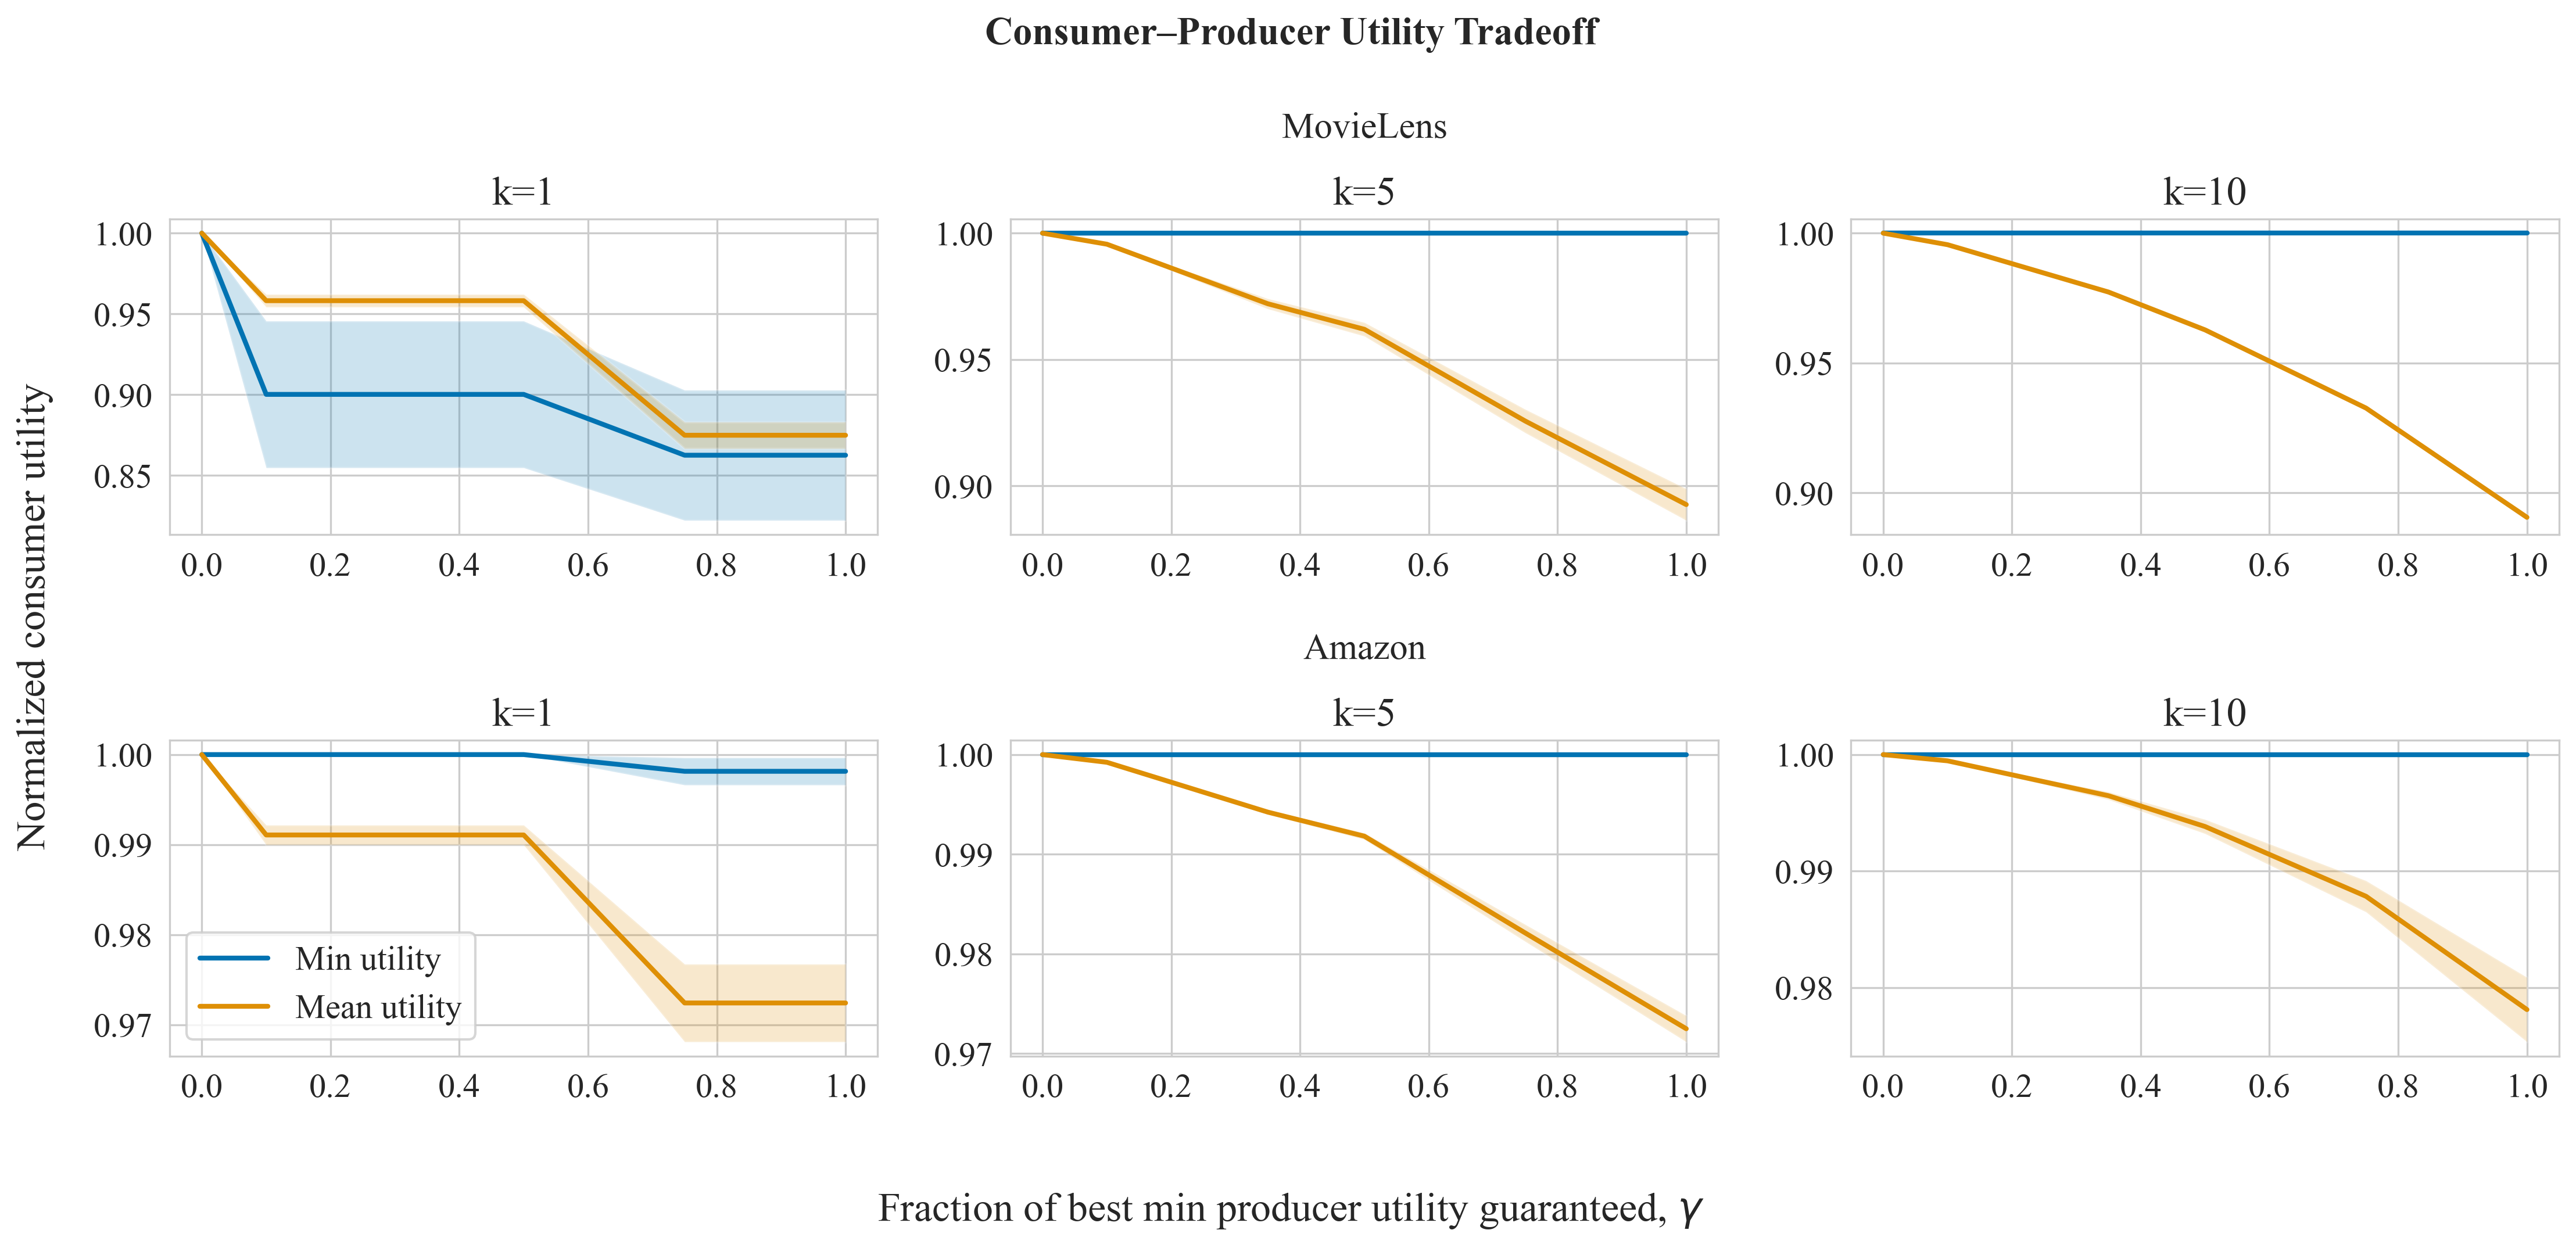

In [11]:
from pathlib import Path
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def load_and_parse(
    base_path: Path,
    dataset: str,
    usage_type: str,
    k_recs: list[int],
    group: int = 1,
    gamma_level: str = "0.95"
) -> dict[int, dict[float, dict[str, float]]]:
    """
    Load JSON result files for different k-recommendation values and normalize their usage metrics.

    Returns a dict mapping k_rec to a dict mapping gamma thresholds (floats) to
    statistics dicts containing 'mean' and 'stderr'.
    """
    dataset = dataset.lower()
    parsed = {}
    filenames = [
        f"{dataset}_{usage_type}_usage_group_100_50_{k}_0_0.1_0.35_0.5_0.75_1_0.95.json"
        for k in k_recs
    ]
    for fname, k in zip(filenames, k_recs):
        filepath = base_path / fname
        with open(filepath, 'r') as f:
            data = json.load(f)
        problem_results = data["results"]["usage_group"][group][gamma_level]
        baseline = np.array(problem_results["0"])
        stats_by_gamma = {}
        for gamma_str, values in problem_results.items():
            arr = np.array(values)
            normalized = arr / baseline
            stats_by_gamma[float(gamma_str)] = {
                "mean": normalized.mean(),
                "stderr": normalized.std(ddof=0) / np.sqrt(len(arr)),
            }
        parsed[k] = stats_by_gamma
    return parsed


def extract_series(
    stats: dict[int, dict[float, dict[str, float]]],
    k: int
) -> tuple[list[float], list[float], list[float]]:
    """
    From parsed statistics, extract x (gamma), y (mean), and yerr (stderr) series for plotting.
    """
    items = sorted(stats[k].items())
    x = [g for g, _ in items]
    y = [s["mean"] for _, s in items]
    yerr = [s["stderr"] for _, s in items]
    return x, y, yerr


# Configuration
base_path = Path("../../results/1746552909")
datasets = ["MovieLens", "Amazon"]  # list your datasets here
k_recs = [1, 5, 10]

# Parse results for each dataset and usage type
parsed_results = {
    ds: {
        usage: load_and_parse(base_path, ds, usage, k_recs)
        for usage in ("mean", "min")
    }
    for ds in datasets
}

# Extract series for plotting
data_series = {}
for ds, usages in parsed_results.items():
    data_series[ds] = {}
    for usage, stats in usages.items():
        data_series[ds][usage] = {}
        for k in k_recs:
            x, mean_vals, err_vals = extract_series(stats, k)
            data_series[ds][usage][k] = {
                "x": x,
                "mean": mean_vals,
                "stderr": err_vals
            }

# Plotting setup
palette = sns.color_palette("colorblind", 2)
sns.set_palette(palette)
fig, axes = plt.subplots(
    nrows=len(datasets),
    ncols=len(k_recs),
    figsize=(15,8),
    dpi=300,
    sharex=True,
    sharey=False,
)

for i, ds in enumerate(datasets):
    # Add dataset name as row title above the row
    axes[i, 1].annotate(
        ds,
        xy=(0.5, 1.08), xycoords='axes fraction',  # center above the row
        xytext=(0.1, 20), textcoords='offset points',
        ha='center', va='bottom', fontsize='15'
    )
    for j, k in enumerate(k_recs):
        ax = axes[i, j]
        for usage in ["min", "mean"]:
            series = data_series[ds][usage][k]
            x = series["x"]
            y = series["mean"]
            err = series["stderr"]
            ax.plot(x, y, label=f"{usage.capitalize()} utility", linewidth=2)
            ax.fill_between(
                x,
                np.array(y) - np.array(err),
                np.array(y) + np.array(err),
                alpha=0.2
            )
        ax.set_title(f"k={k}")
        if j == 0 and i == 1:
            # set values for legend
            ax.legend(loc="lower left")

fig.supxlabel(
    r"Fraction of best min producer utility guaranteed, $\gamma$",
    x=0.5, y=0.06, ha="center"
)
fig.supylabel(
    "Normalized consumer utility",
    x=0.02, y=0.5, ha="center"
)
fig.suptitle(
# bold
'Consumer–Producer Utility Tradeoff',
    x=0.5, y=0.93, fontsize=16, fontweight='bold', ha="center"
)
for ax_row in axes:
    for ax in ax_row:
        ax.tick_params(labelbottom=True)
        # set y-axis ticks to also be visible
        ax.tick_params(labelleft=True)

plt.tight_layout(rect=[0, 0.07, 1, 0.95])
plt.savefig(base_path / "consumer_producer_tradeoff_for_min_prob.pdf", dpi=300)
